In [1]:
%run utils.py
%run model.py

In [3]:
from utils import *
from model import *

import numpy as np
import random
from collections import defaultdict
import pickle
import matplotlib.pyplot as plt

Инициализация сети

In [6]:
net, convergence, dim = find_convergence(40, 40, 100, verbose=True)
# 13924 - max nodes
# 96_931_926 - max edges

# Если граф состоит из одной точки он не рисуется
# 10000, 1000000 - максимальные параметры для этого компа


 19%|█▉        | 19/100 [00:00<00:00, 1507.71it/s]

STOPPED! at 19


In [38]:

p = 10
net, convergence_1, dim_1, convergence_2, dim_2 = find_convergence(10, p, 100, verbose=True, edgeid=random.randint(0, p-1))


  5%|▌         | 5/100 [00:00<00:00, 3972.63it/s]

STOPPED! at 3
CUTTED!
STOPPED! at 5


In [2]:
base = 1.05

log = {}

for n in tqdm(range(3, 20)):
    p_max = int(n * (n - 1) / 2)

    for p in range(3, p_max):
        topologies_num = int((base**(n)) * np.log(p))
        # print(topologies_num)
        # print(n, p)
        for topology_num in range(topologies_num):

            _, c1, d1, c2, d2 = find_convergence(20, p, 100, verbose=False, edgeid=random.randint(0, p-1))

            log[f"{n}_{p}_{topology_num}"] = (c1, d1, c2, d2)
            
            with open('log.pkl', 'wb') as file:
                pickle.dump(log, file)



 88%|████████▊ | 15/17 [22:36<06:17, 188.84s/it]

: 

: 

In [4]:
with open('log.pkl', 'rb') as file:
    log = pickle.load(file)


In [6]:
# log

In [7]:
struct_c1 = defaultdict(lambda: defaultdict(list))
struct_d1 = defaultdict(lambda: defaultdict(list))
struct_c2 = defaultdict(lambda: defaultdict(list))
struct_d2 = defaultdict(lambda: defaultdict(list))

for key, value in log.items():
    n, p, _ = key.split("_")
    struct_c1[int(n)][int(p)] += [value[0]]
    struct_d1[int(n)][int(p)] += [value[1]]
    struct_c2[int(n)][int(p)] += [value[2]]
    struct_d2[int(n)][int(p)] += [value[3]]

In [8]:
struct_с1_def = defaultdict(lambda: defaultdict(int))

for n in struct_c1.keys():
    for p in struct_c1[n].keys():
        struct_с1_def[n][p] = np.mean(struct_c1[n][p])

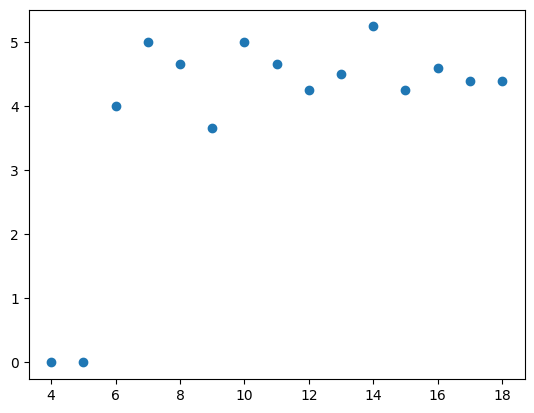

In [9]:
p = 10

X = list(struct_с1_def.keys())
y = []
for n in struct_с1_def.keys():
    y += [struct_с1_def[n][p]]

plt.scatter(X, y)
plt.show()

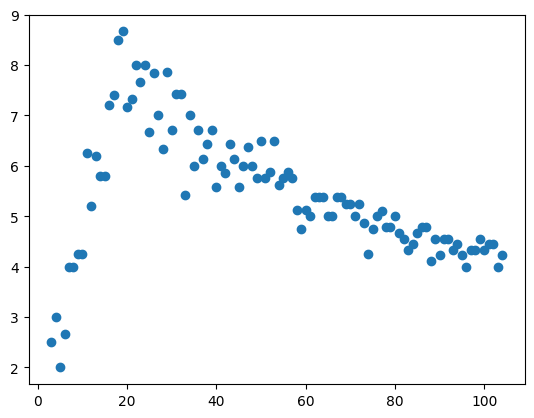

In [10]:
n = 15


X = list(struct_с1_def[n].keys())
y = []
for p in struct_с1_def[n].keys():
    y += [struct_с1_def[n][p]]

plt.scatter(X, y)
plt.show()

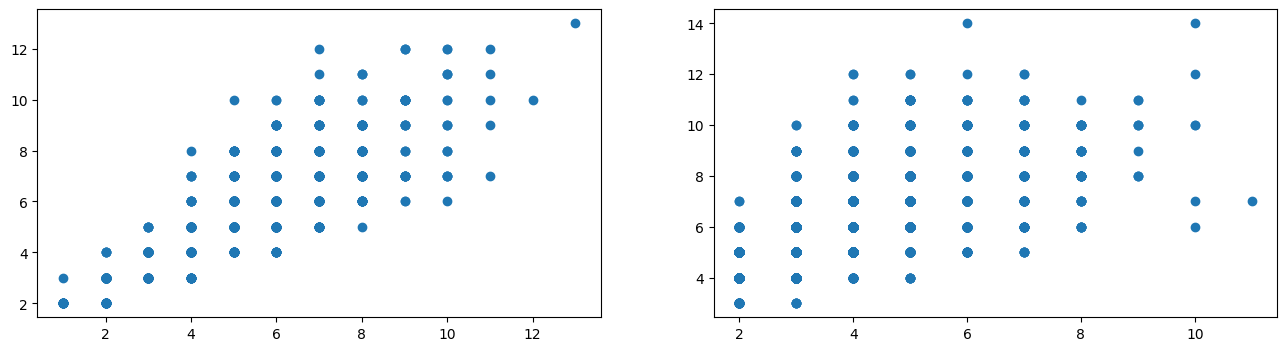

In [14]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 4))
X1, X2 = [], []
y1, y2 = [], []
for key, value in log.items():
    n, p, _ = key.split("_")
    if int(p) <= 20:
        X1 += [value[1]]
        y1 += [value[0]]
    else:
        X2 += [value[1]]
        y2 += [value[0]]
axes[0].scatter(X1, y1)
axes[1].scatter(X2, y2)

plt.show()

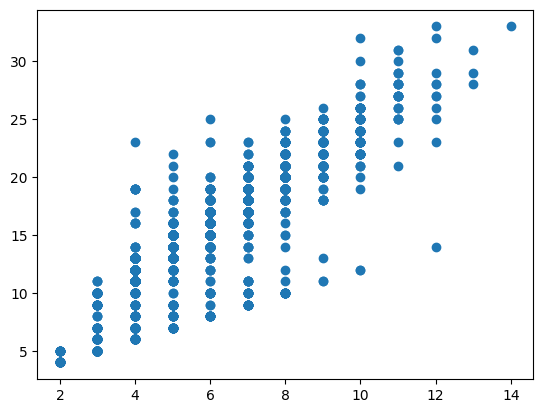

In [37]:
X = []
y =  []
for key, value in log.items():
    X += [value[0]]
    y += [value[2]]

plt.scatter(X, y)

plt.show()

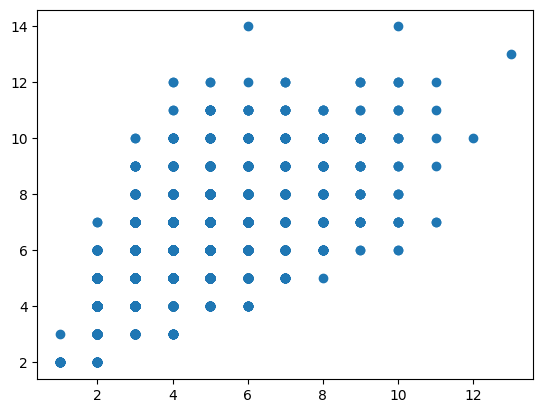

In [18]:
X = []
y = []
for key, value in log.items():

    X += [value[1]]
    y += [value[0]]

plt.scatter(X, y)

plt.show()

In [15]:
from sklearn.linear_model import LinearRegression

In [23]:
reg = LinearRegression().fit(np.array(X).reshape(len(X), 1), y)

In [24]:
reg.intercept_

3.0949178568226006

In [25]:
reg.coef_

array([0.67649212])

In [4]:
base = 1.05

log = {}

for n in tqdm(range(3, 17)):
    p_max = int(n * (n - 1) / 2)

    for p in range(3, p_max):
        topologies_num = int((base**(n)) * np.log(p))
        # print(topologies_num)
        # print(n, p)
        for topology_num in range(topologies_num):

            _, c1, d1, r1 = find_convergence(n, p, 100, verbose=False, root_in_center=True, radius=True)

            log[f"{n}_{p}_{topology_num}"] = (c1, d1, r1)
            
            with open('log_root_in_center.pkl', 'wb') as file:
                pickle.dump(log, file)



  0%|          | 0/14 [00:00<?, ?it/s]

100%|██████████| 14/14 [14:03<00:00, 60.25s/it] 


In [9]:
base = 1.05

log = {}

for n in tqdm(range(3, 17)):
    p_max = int(n * (n - 1) / 2)

    for p in range(3, p_max):
        topologies_num = int((base**(n)) * np.log(p))
        # print(topologies_num)
        # print(n, p)
        for topology_num in range(topologies_num):

            _, c1, d1, r1 = find_convergence(n, p, 100, verbose=False, root_in_center=False, radius=True)

            log[f"{n}_{p}_{topology_num}"] = (c1, d1, r1)
            
            with open('log_root_nin_center.pkl', 'wb') as file:
                pickle.dump(log, file)



100%|██████████| 14/14 [14:28<00:00, 62.05s/it] 


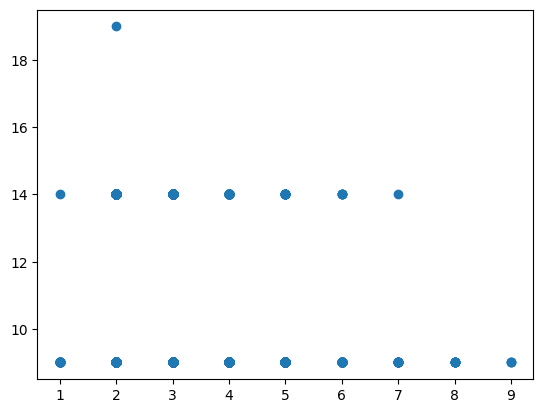

In [16]:
with open('log_root_in_center.pkl', 'rb') as file:
    log = pickle.load(file)
X = []
y =  []
for key, value in log.items():
    X += [value[1]]
    y += [value[0]]

plt.scatter(X, y)

plt.show()

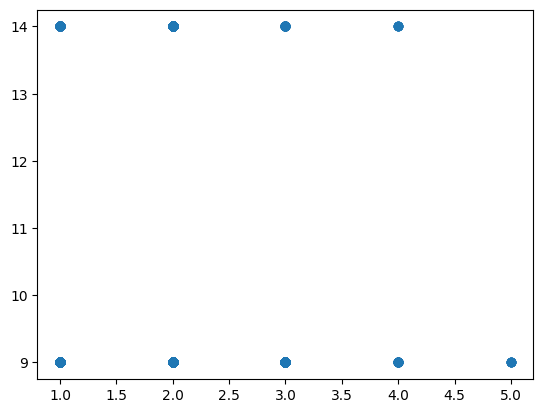

In [11]:
with open('log_root_in_center.pkl', 'rb') as file:
    log_root_in_center = pickle.load(file)
X = []
y =  []
for key, value in log_root_in_center.items():
    X += [value[2]]
    y += [value[0]]

plt.scatter(X, y)

plt.show()

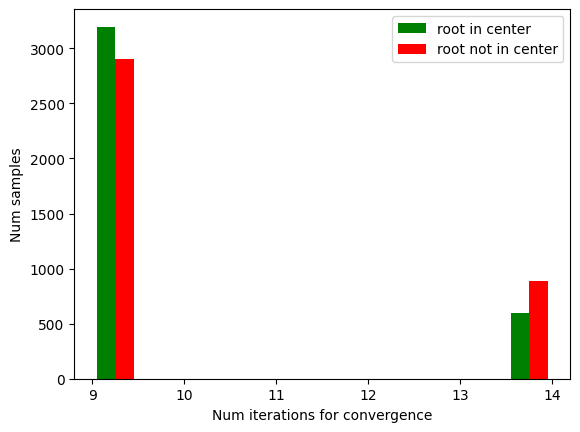

In [39]:
with open('log_root_in_center.pkl', 'rb') as file:
    log_root_in_center = pickle.load(file)
y_ric =  []
for key, value in log_root_in_center.items():
    y_ric += [value[0]]
   
with open('log_root_nin_center.pkl', 'rb') as file:
    log_root_nin_center = pickle.load(file)
y_rnc =  []
for key, value in log_root_nin_center.items():
    y_rnc += [value[0]]

plt.hist([y_ric, y_rnc], color=['g','r'])
plt.legend(['root in center','root not in center'])
plt.xlabel('Num iterations for convergence')
plt.ylabel('Num samples') 
plt.show()

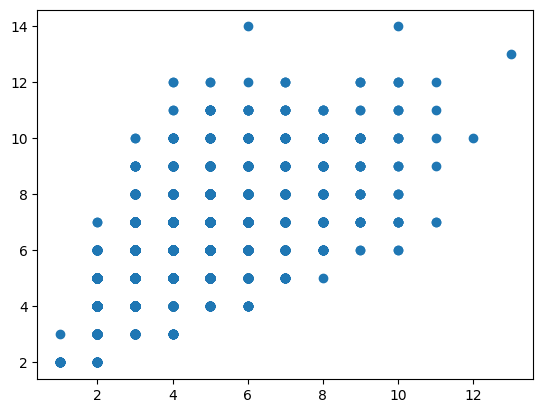

In [15]:
with open('log.pkl', 'rb') as file:
    log = pickle.load(file)
X = []
y =  []
for key, value in log.items():
    X += [value[1]]
    y += [value[0]]

plt.scatter(X, y)

plt.show()